In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
plt.style.use('dark_background')
#import proplot as pplt

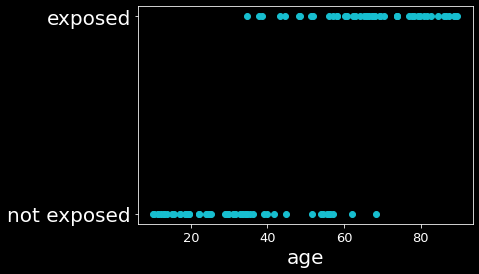

In [99]:
X = ss.uniform.rvs(size=100)*80+10
exponent =  (X-10)/80*10-5
#X = ss.uniform.rvs(size=100)
#exponent = X*np.log(10)-2
p = 1/(1+np.exp(-exponent))
z = ss.bernoulli.rvs(p=p)
# x_un = ss.uniform.rvs(size=80)
# x_ex = ss.uniform.rvs(size=20)+1
# z = np.concatenate([np.zeros(80), np.ones(20)])
fig, ax = plt.subplots(figsize=(6,4))
# X = np.concatenate([x_un, x_ex])
ax.scatter(X, z, color='tab:cyan')
ax.set_yticks([0,1])
ax.set_yticklabels(['not exposed', 'exposed'], fontsize=20)
ax.set_xlabel('age', fontsize=20)
ax.tick_params(axis='x',labelsize=13)
fig.savefig('defense_figs/exposures.png',dpi=300, bbox_inches='tight')

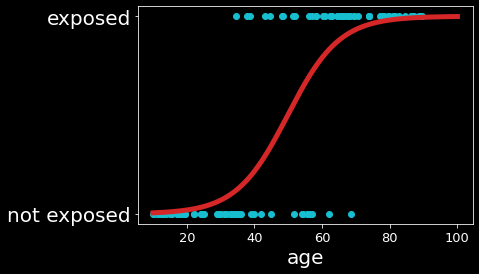

In [100]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, C=10,).fit(X.reshape(-1,1), z)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, z, color='tab:cyan')
x = np.linspace(10,100,300)
ax.plot(x, LR.predict_proba(x.reshape(-1,1))[:,1], color='tab:red', linewidth=5)
ax.set_yticks([0,1])
ax.set_yticklabels(['not exposed', 'exposed'], fontsize=20)
ax.set_xlabel('age', fontsize=20)
ax.tick_params(axis='x',labelsize=13)
fig.savefig('defense_figs/exposures_logistic.png',dpi=300, bbox_inches='tight')